# Praca domowa 6

## Zadanie 1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
df1 = df.loc[df.waterfront == 1]
df1.loc[df1.grade >= df1.grade.median()].price.mean()

2302236.3095238097

Odp: Średnia wynosi 2302236.30 $

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
df.loc[df.floors == 2].bathrooms.median() > df.loc[df.floors == 3].bathrooms.median()

False

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
df.loc[df.lat > (df.lat.min() + df.lat.max()) / 2].groupby("waterfront").grade.quantile([0.25, 0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: 
*   Bez widoku na wode : kwantyl 0.25 = 7
*   Bez widoku na wode : kwantyl 0.75 = 8

*   Z widokiem na wode : kwantyl 0.25 = 8
*   Z widokiem na wode : kwantyl 0.75 = 10


    

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
z = df.zipcode.mode()[0]
df.loc[df.zipcode == z].price.quantile(0.75) -df.loc[df.zipcode == z].price.quantile(0.25)

262875.0

Odp: Najczęstszy kod pocztowy to 98103, IQR dla ceny nieruchomości z tym kodem pocztowym = 262875.0 $

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
df.loc[df.sqft_living15 > df.sqft_living].shape[0]/df.shape[0]*100

42.594734650441865

Odp: Około 42,6 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [4]:
nw_count = df.loc[(df.lat > (df.lat.min() + df.lat.max()) / 2) & (df.long < (df.long.min() + df.long.max()) / 2)].shape[0]
se_count = df.loc[(df.lat < (df.lat.min() + df.lat.max()) / 2) & (df.long > (df.long.min() + df.long.max()) / 2)].shape[0]
(nw_count - se_count) / se_count * 100

18343.529411764706

Odp: Jest ich o około 18343,5 % więcej

# Zadanie 2

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

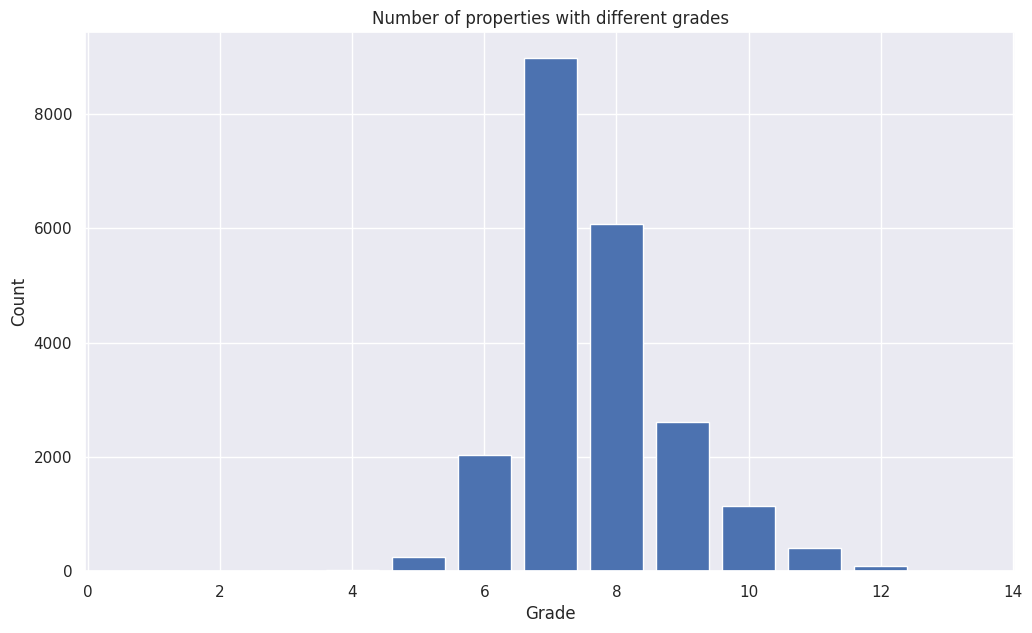

In [ ]:
df1 = df.groupby("grade").condition.agg("count")
plt.bar(list(df1.index), df1.to_list())
plt.title("Number of properties with different grades")
plt.ylabel("Count")
plt.xlabel("Grade")
plt.show()

b)

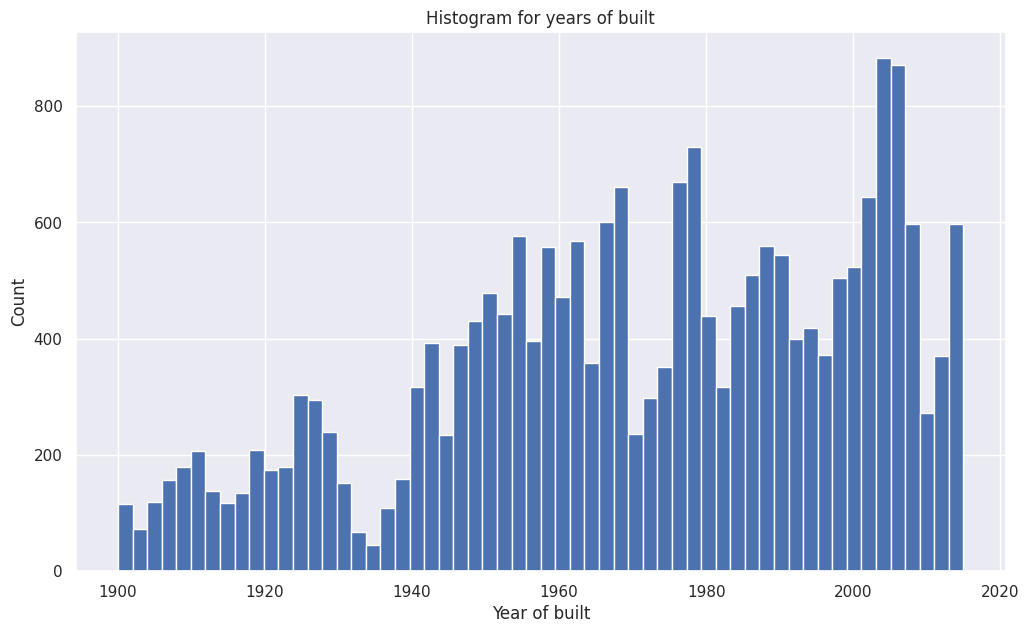

In [ ]:
num_bins = round(len(pd.unique(df.yr_built)) / 2)
plt.hist(data = df, x = 'yr_built', bins = num_bins)
plt.title("Histogram for years of built")
plt.ylabel("Count")
plt.xlabel("Year of built")
plt.show()

c)

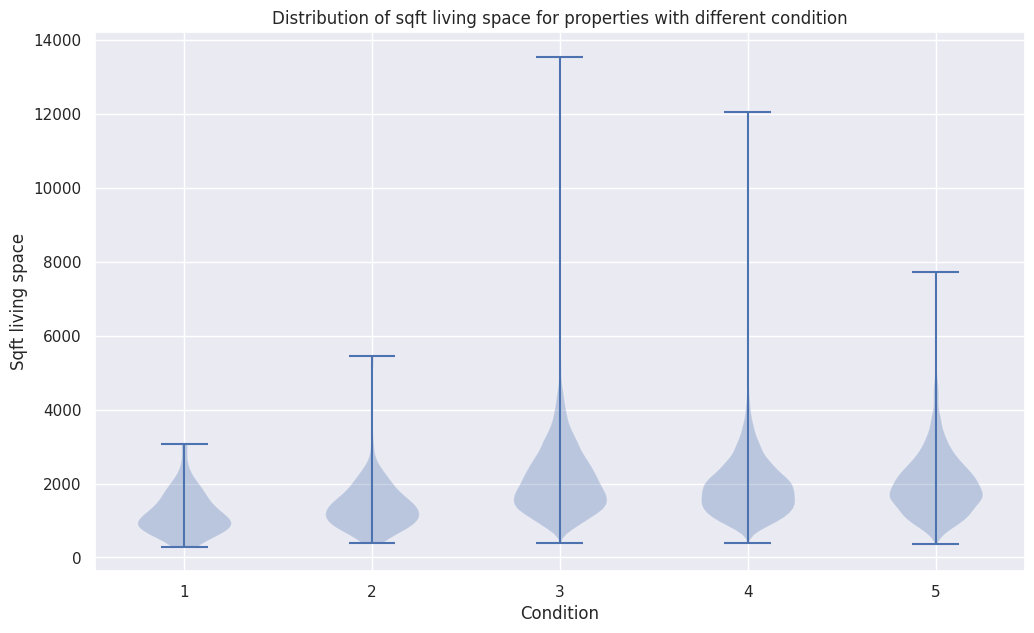

In [ ]:
df1 = df.groupby("condition").sqft_living
df1 = [df1.get_group(x) for x in df1.groups]
plt.violinplot(df1)
plt.title("Distribution of sqft living space for properties with different condition")
plt.ylabel("Sqft living space")
plt.xlabel("Condition")
plt.show()